In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Load dataset

In [2]:
train_path = '/kaggle/input/tmbd-dataset/processed_data_final_final.csv'
train_data = pd.read_csv(train_path, index_col=None)

In [ ]:
ori_path = '/kaggle/input/revised-dataset/output.csv'
ori_data = pd.read_csv(ori_path, index_col=None)

In [ ]:
ori_data.info()

In [ ]:
test_path = '/kaggle/input/box-office-dataset/normalized_IMDB.csv'
test_data = pd.read_csv(test_path, index_col=None)

## Data Processing

In [3]:
train_data

,Unnamed: 0,budget,popularity,runtime,log_revenue,release_day,release_month,release_year,_budget_runtime_ratio,_budget_popularity_ratio,...,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Working Title Films,production_companies_etc
0,0,0.013684,0.005148,0.009848,16.326300,4,2,2015,0.004637,0.000108,...,0,0,1,0,0,0,0,0,0,0
1,1,0.014557,0.006459,0.011966,18.370959,4,8,2004,0.010905,0.000245,...,0,0,0,0,0,1,0,0,0,0
2,2,0.012482,0.050345,0.011119,16.387512,4,10,2014,0.000968,0.000003,...,0,0,0,0,0,0,0,0,0,1
3,3,0.011641,0.002486,0.012919,16.588099,4,3,2012,0.000303,0.000019,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000000,0.000899,0.012495,15.182615,3,2,2009,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2995,0.000000,0.007715,0.010801,14.283442,4,4,1994,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2951,2996,0.000000,0.002919,0.010801,12.103990,3,3,2013,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2952,2997,0.014961,0.011339,0.012707,18.309266,4,10,1996,0.016687,0.000227,...,0,0,0,0,0,0,0,0,0,1
2953,2998,0.014598,0.012313,0.009530,18.962792,4,1,2004,0.014376,0.000135,...,0,0,0,0,0,0,0,0,0,1


In [4]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
train_data.shape

(2955, 169)

In [6]:
train_data.isnull().sum()

budget                      0
popularity                  0
runtime                     0
log_revenue                 0
release_day                 0
                           ..
Walt Disney Pictures        0
Warner Bros.                0
Wild Bunch                  0
Working Title Films         0
production_companies_etc    0
Length: 169, dtype: int64

In [7]:
train_data['log_revenue'].describe()

count    2955.000000
mean       16.160770
std         2.618082
min         5.293305
25%        14.794624
50%        16.668317
75%        18.074710
max        21.141685
Name: log_revenue, dtype: float64

In [8]:
train_data.describe()

,budget,popularity,runtime,log_revenue,release_day,release_month,release_year,_budget_runtime_ratio,_budget_popularity_ratio,_budget_year_ratio,...,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Working Title Films,production_companies_etc
count,2955.000000,2.955000e+03,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,...,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000
mean,0.009981,6.693736e-03,0.011428,16.160770,3.270051,6.775973,1999.835533,0.006235,0.000160,0.006150,...,0.046701,0.003723,0.014890,0.063283,0.012183,0.020981,0.067682,0.003723,0.010152,0.800338
std,0.006148,9.528199e-03,0.002334,2.618082,1.303931,3.405445,15.210107,0.009645,0.000562,0.009979,...,0.211032,0.060909,0.121133,0.243512,0.109720,0.143346,0.251242,0.060909,0.100263,0.399814
min,0.000000,7.829737e-10,0.000000,5.293305,0.000000,1.000000,1921.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.275257e-03,0.009954,14.794624,2.000000,4.000000,1993.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.013219,5.822193e-03,0.011013,16.668317,4.000000,7.000000,2004.000000,0.002319,0.000062,0.002188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.014318,8.564125e-03,0.012495,18.074710,4.000000,10.000000,2011.000000,0.008281,0.000193,0.008023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.016429,2.304582e-01,0.035792,21.141685,6.000000,12.000000,2017.000000,0.086076,0.021813,0.101678,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Columns: 169 entries, budget to production_companies_etc
dtypes: float64(24), int64(145)
memory usage: 3.8 MB


In [10]:
test_data.info()

NameError: name 'test_data' is not defined

In [ ]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
revenue_test_data = test_data['log_worldwide']

In [ ]:
# test_data.columns = ['name', 'company','released','country','MPAA','runtime','genre','overview','star','director','gross','domestic','foreign','year']

In [ ]:
# test_data.loc[test_data['country'] == 'Domestic','country'] = 'American'

In [ ]:
test_data.drop(['log_worldwide'], axis=1, inplace=True)

In [ ]:
test_data

In [ ]:
import re
def convert2minute(s):
    matches = re.findall("\d+", s)
    if len(matches) == 1:  # Chỉ có một số (giờ hoặc phút)
        if "hr" in s:
          return int(matches[0]) * 60  # Giờ
        else:
          return int(matches[0])  # Phút
    return int(matches[0]) * 60 + int(matches[1])

test_data['runtime'] = test_data['runtime'].apply(convert2minute)

In [ ]:
test_data

In [ ]:
# fit_test_data = test_data[['released','name', 'genre', 'director', 'star', 'company', 'runtime','year']]

In [ ]:
# fit_test_data['runtime'].unique()

In [ ]:
# fit_test_data

### One hot encoding

In [ ]:
# Trước tiên, chuyển các cột list sang dạng chuỗi để có thể áp dụng One-Hot Encoding
df['genre'] = df['genre'].apply(lambda x: ','.join(x))
df['star'] = df['star'].apply(lambda x: ','.join(x))
df['director'] = df['director'].apply(lambda x: ','.join(x))

# Áp dụng One-Hot Encoding cho các cột không phải dạng số
df_encoded = pd.get_dummies(df, columns=['company', 'country', 'released', 'genre', 'star', 'director'])

# Hiển thị DataFrame sau khi One-Hot Encoding
df_encoded

### Fit data into model

In [ ]:
def new_transform(data, test_size, random_state):
    le = LabelEncoder()
    # các trường dữ liệu không phải numeric cần được chuẩn hóa
    categorical_features = ['released', 'name', 'genre', 'director', 'star', 'country', 'companny','MPAA']
    for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature])
        
    features = data[['released','name', 'genre', 'director', 'star','company', 'country', 'MPAA','runtime']]
    target = data['gross']
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=test_size, random_state=random_state)
    return X_train, X_valid, y_train, y_valid

In [ ]:
def ori_transform(data, test_size, random_state):
    le = LabelEncoder()
    # các trường categorical data cần được encode
    categorical_features = ['released','name', 'genre', 'director', 'star', 'company','country']
    #categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

    for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature])

    # Our features and target
    features = data[['released','name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
    #features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
    target = data['gross']
    
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=test_size, random_state=random_state)
    return X_train, X_valid, y_train, y_valid, features, target

# Training model

In [11]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Decision Tree Bagging

In [ ]:
def decision_tree_bagging(X_train, X_valid, y_train, y_valid):

    # decision tree
    base_estimator = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

    # Bagging to imporove accuracy
    model = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

    # fit data to model
    model.fit(X_train, y_train)

    # model predict
    train_predictions = model.predict(X_train)
    valid_predictions = model.predict(X_valid)
    
    return train_predictions, valid_predictions, model

In [16]:
revenue_train_data = train_data['log_revenue']

In [17]:
revenue_train_data.min()

5.293304824724492

In [18]:
revenue_train_data.max()

21.14168528147379

In [19]:
train_data.drop(['log_revenue'], axis=1, inplace=True)

In [ ]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split()

# train model & test
train_predictions, valid_predictions, model = decision_tree_bagging(X_train, X_valid, y_train, y_valid)

# R2 scores 
train_accuracy = r2_score(y_train, train_predictions)
valid_accuracy = r2_score(y_valid, valid_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {valid_accuracy*100:.2f}%')
# MAPE 
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {valid_mape:.2f}%')
      
# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_valid, valid_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values on Kaggle dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# model run on IMDB dataset
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split()

# train model & test
train_predictions, valid_predictions, model = decision_tree_bagging(X_train, X_valid, y_train, y_valid)

# R2 scores 
train_accuracy = r2_score(y_train, train_predictions)
valid_accuracy = r2_score(y_valid, valid_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {valid_accuracy*100:.2f}%')
# MAPE 
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {valid_mape:.2f}%')
      
# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_valid, valid_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values on Kaggle dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
del model

## Gradient Boost

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Implementing GridSearchCV 
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

# training model
best_model = GradientBoostingRegressor(loss='squared_error', random_state=42, **best_params)

best_model.fit(X_train, y_train)

train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_valid)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_valid, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_valid, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')

# Plot actual vs predicted values with enhancements
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_valid, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_valid, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_valid, p(y_valid), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)
plt.show()

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R^2 Score: 0.6096352679596364

Final Training Accuracy: 79.60%
Final Test Accuracy: 59.32%
Train MAPE: 0.06%
Test MAPE: 0.08%
Train MSE: 1.408780963806202
Test MSE: 2.84212090939156


In [ ]:
print(y_valid[0:10])
print(valid_predictions[0:10])

In [ ]:
del best_model

## Linear Regression PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [ ]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=8)  
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

model = LinearRegression()

model.fit(X_train_pca, y_train)

train_predictions = model.predict(X_train_pca)
valid_predictions = model.predict(X_valid_pca)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
valid_accuracy = r2_score(y_valid, valid_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {valid_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {valid_mape:.2f}%')

# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_valid, valid_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values on Kaggle dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
del model

## Linear Regression

In [ ]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_valid)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_valid, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_valid, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')
# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_valid, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values on Kaggle dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# model predict on IMDB dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
del model

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor


Final Training Accuracy: 81.07%
Final Test Accuracy: 57.14%
Train MAPE: 0.06%
Test MAPE: 0.09%
Train MSE: 1.3071702355158863
Test MSE: 2.84212090939156


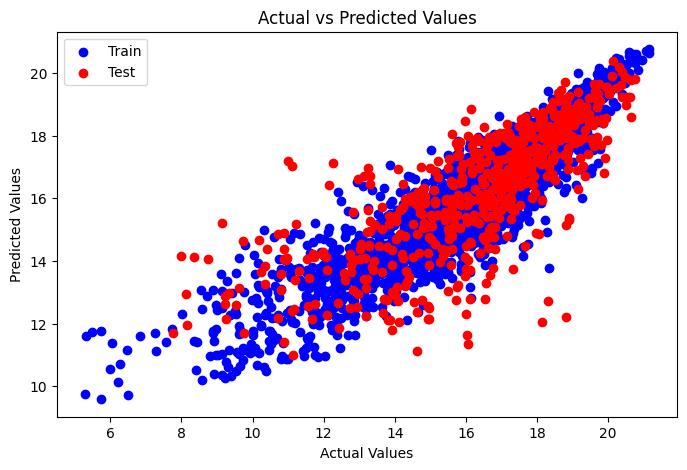

In [24]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
valid_accuracy = r2_score(y_valid, valid_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {valid_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
valid_mape = mean_absolute_percentage_error(y_valid, valid_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_valid, valid_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')
# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_valid, valid_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# test = model.predict(fit_movies)
# print(test)

In [ ]:
mean_absolute_percentage_error(test, movies['gross'])

In [ ]:
del model

## Tracking XGBoost

In [25]:
import xgboost as xgb

In [26]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data
    
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a custom callback class to track the training R-squared score
train_r2_scores = []

class TrackR2Score(xgb.callback.TrainingCallback):
    def after_iteration(self, model, epoch, evals_log):
        # Calculate the training R-squared score
        pred = model.predict(xgb.DMatrix(X_train, label=y_train))
        train_r2 = r2_score(y_train, pred)
        train_r2_scores.append(train_r2)

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42, callbacks=[TrackR2Score()]), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(features, target)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_model.fit(X_train, y_train)
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)
print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# MSE
train_mse = mean_squared_error(y_train, train_predictions)
valid_mse = mean_squared_error(y_test, test_predictions)
      
print(f'Train MSE: {train_mse}')   
print(f'Test MSE: {valid_mse}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R^2 Score: 0.61195615532664

Final Training Accuracy: 78.08%
Final Test Accuracy: 58.44%
Train MAPE: 0.06%
Test MAPE: 0.08%
Train MSE: 1.5136856808393417
Test MSE: 2.7560382020452128


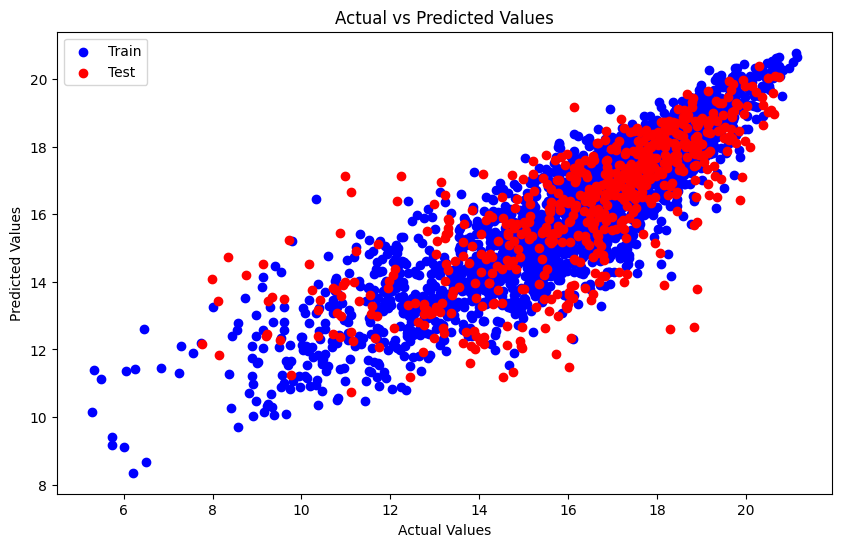

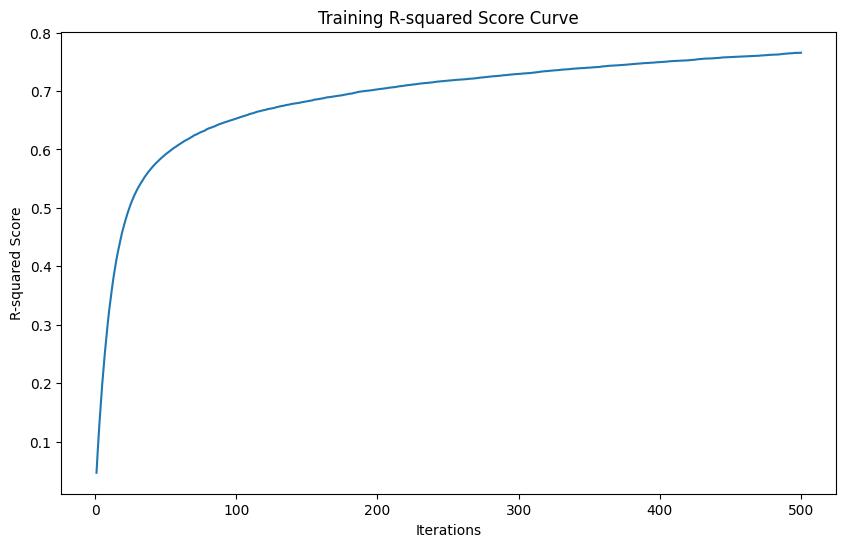

In [27]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot the training R-squared score curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_r2_scores)+1), train_r2_scores)
plt.title('Training R-squared Score Curve')
plt.xlabel('Iterations')
plt.ylabel('R-squared Score')
plt.show()

In [ ]:
del best_model

## XGBoost

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R^2 Score: 0.61195615532664

Final Training Accuracy: 78.08%
Final Test Accuracy: 58.44%
Train MAPE: 0.06%
Test MAPE: 0.08%


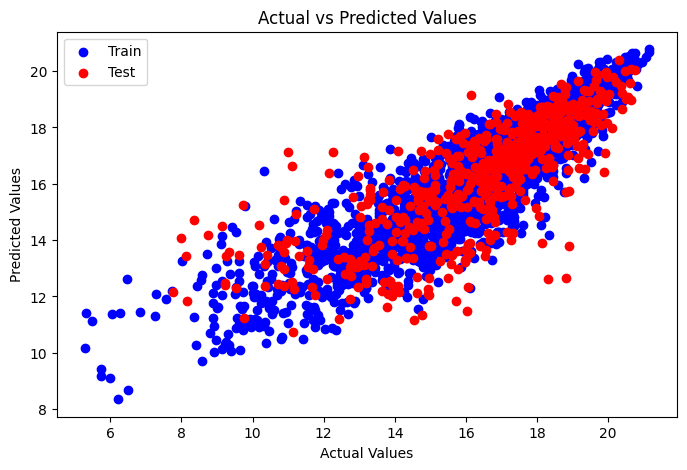

In [33]:
# Our features and target
features = train_data
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]
target = revenue_train_data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective ='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

best_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42, **best_params)

best_model.fit(X_train, y_train)

train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# R2 scores and MAPE Calculation
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Train')
plt.scatter(y_test, test_predictions, color='red', label='Test')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
del best_model